## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing scor

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [91]:
# Read the dataset
df=pd.read_csv('exams.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,high school,free/reduced,none,68,57,54
1,female,group D,high school,free/reduced,none,62,74,80
2,male,group D,high school,free/reduced,completed,68,70,73
3,male,group D,some college,standard,none,62,63,61
4,female,group B,bachelor's degree,standard,none,83,96,100
...,...,...,...,...,...,...,...,...
995,male,group E,bachelor's degree,standard,none,72,61,59
996,male,group A,associate's degree,standard,none,73,68,68
997,male,group A,associate's degree,standard,completed,89,90,83
998,female,group B,some college,standard,none,47,50,53


In [92]:
df.shape

(1000, 8)

## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [93]:
# Check Missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Insights or Observation
There are no missing values

There is one duplicate value in the dataset

now duplicate values are clear

In [94]:
# Check Duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(999, 8)

In [95]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       999 non-null    object
 1   race/ethnicity               999 non-null    object
 2   parental level of education  999 non-null    object
 3   lunch                        999 non-null    object
 4   test preparation course      999 non-null    object
 5   math score                   999 non-null    int64 
 6   reading score                999 non-null    int64 
 7   writing score                999 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 70.2+ KB


In [96]:
# Check the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     77
reading score                  72
writing score                  76
dtype: int64

In [97]:
# Check statistics of data set
df.describe()

,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.648649,69.610611,68.434434
std,15.451964,14.413502,15.431322
min,9.000000,15.000000,16.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


### Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value
- Here maximum value is 100 in each feature

In [98]:
# segrregating numerical features
[feature for feature in df.columns if df[feature].dtype == 'int64' ]

['math score', 'reading score', 'writing score']

In [99]:
# segrregating numerical and categorical features
numerical_features =[feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

In [100]:
numerical_features

['math score', 'reading score', 'writing score']

In [101]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [102]:
df['gender'].value_counts()

female    518
male      481
Name: gender, dtype: int64

In [103]:
df['race/ethnicity'].value_counts()

group C    297
group D    255
group B    230
group E    143
group A     74
Name: race/ethnicity, dtype: int64

In [104]:
df['parental level of education'].value_counts()

some college          258
some high school      194
associate's degree    186
high school           183
bachelor's degree     109
master's degree        69
Name: parental level of education, dtype: int64

### Renaming feature race/ethnicity to race_ethnicity

In [105]:
df.rename(columns={'race/ethnicity': 'race_ethnicity'},inplace=True)

In [106]:
df

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,high school,free/reduced,none,68,57,54
1,female,group D,high school,free/reduced,none,62,74,80
2,male,group D,high school,free/reduced,completed,68,70,73
3,male,group D,some college,standard,none,62,63,61
4,female,group B,bachelor's degree,standard,none,83,96,100
...,...,...,...,...,...,...,...,...
995,male,group E,bachelor's degree,standard,none,72,61,59
996,male,group A,associate's degree,standard,none,73,68,68
997,male,group A,associate's degree,standard,completed,89,90,83
998,female,group B,some college,standard,none,47,50,53


In [107]:
# aggregate the total score with mean
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,male,group E,high school,free/reduced,none,68,57,54,179,59.666667
1,female,group D,high school,free/reduced,none,62,74,80,216,72.000000
2,male,group D,high school,free/reduced,completed,68,70,73,211,70.333333
3,male,group D,some college,standard,none,62,63,61,186,62.000000
4,female,group B,bachelor's degree,standard,none,83,96,100,279,93.000000
...,...,...,...,...,...,...,...,...,...,...
995,male,group E,bachelor's degree,standard,none,72,61,59,192,64.000000
996,male,group A,associate's degree,standard,none,73,68,68,209,69.666667
997,male,group A,associate's degree,standard,completed,89,90,83,262,87.333333
998,female,group B,some college,standard,none,47,50,53,150,50.000000


In [108]:
df['average'].value_counts()

70.666667    17
65.666667    14
69.666667    14
72.333333    14
76.666667    12
             ..
28.333333     1
89.000000     1
43.000000     1
37.333333     1
99.000000     1
Name: average, Length: 193, dtype: int64

## Visualization

<Axes: xlabel='average', ylabel='Count'>

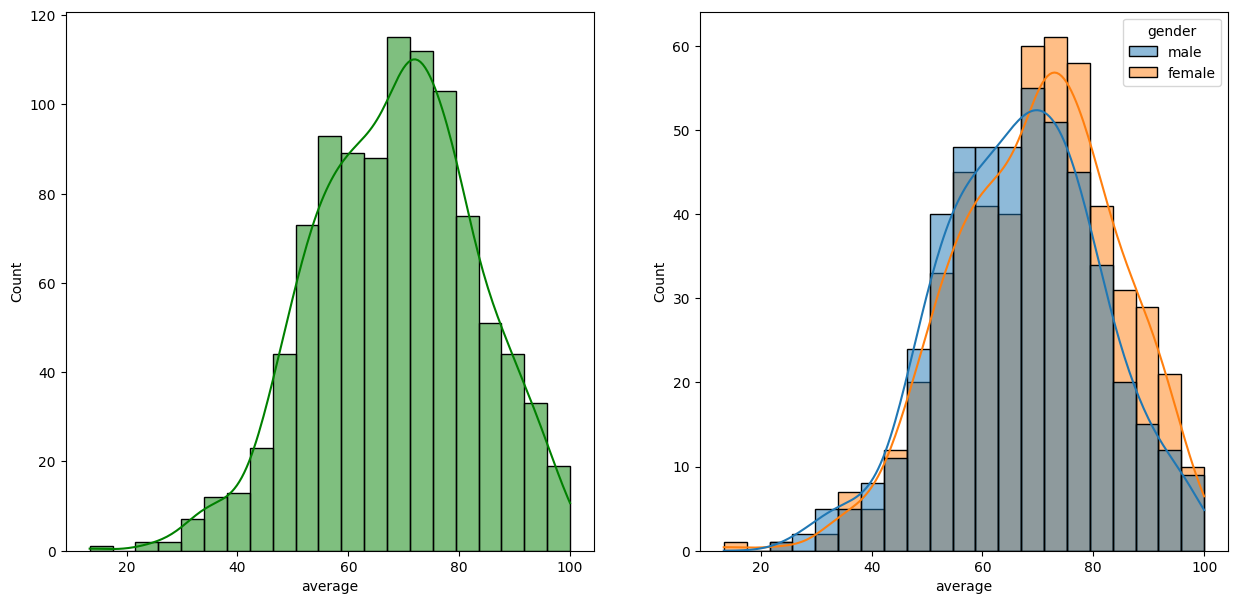

In [136]:
# SIR CODES ############################################ 
# fig,axis=plt.subplots(1,2,figsize=(15,7))
# plt.subplot(121)
# sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
# plt.subplot(122)
# sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

#MY CODES ############################################ 
plt.subplots(1, # this is row
                        2, # this is column
                        figsize = (15,7))
plt.subplot(121) # it means yha 1 row aur 2 column hai aur 1 location denote kr raa h(mtlb 1st index pe)
sns.histplot(data=df,x='average',kde=True,color='g')
plt.subplot(122) # it means yha 1 row aur 2 column hai aur 2 location denote kr raa h(mtlb 2nd index pe)
sns.histplot(df,x='average',kde=True,hue='gender')


##### above codes explaination
`fig` is the figure object, which is like a container for all the subplots that will be created. It is used to set various properties of the figure, such as its size, title, and background color.

`axis` is a single subplot, or a collection of subplots if more than one was created. It is used to plot data onto the figure, set the x and y axis labels, and set various other properties of the subplot.

By default, `plt.subplots()` creates a single subplot, which is equivalent to calling plt.subplots(nrows=1, ncols=1). However, you can create multiple subplots by specifying the number of rows and columns you want, such as fig, axs = plt.subplots(nrows=2, ncols=3), which would create a figure with 6 subplots arranged in a 2x3 grid.

<Axes: xlabel='average', ylabel='Count'>

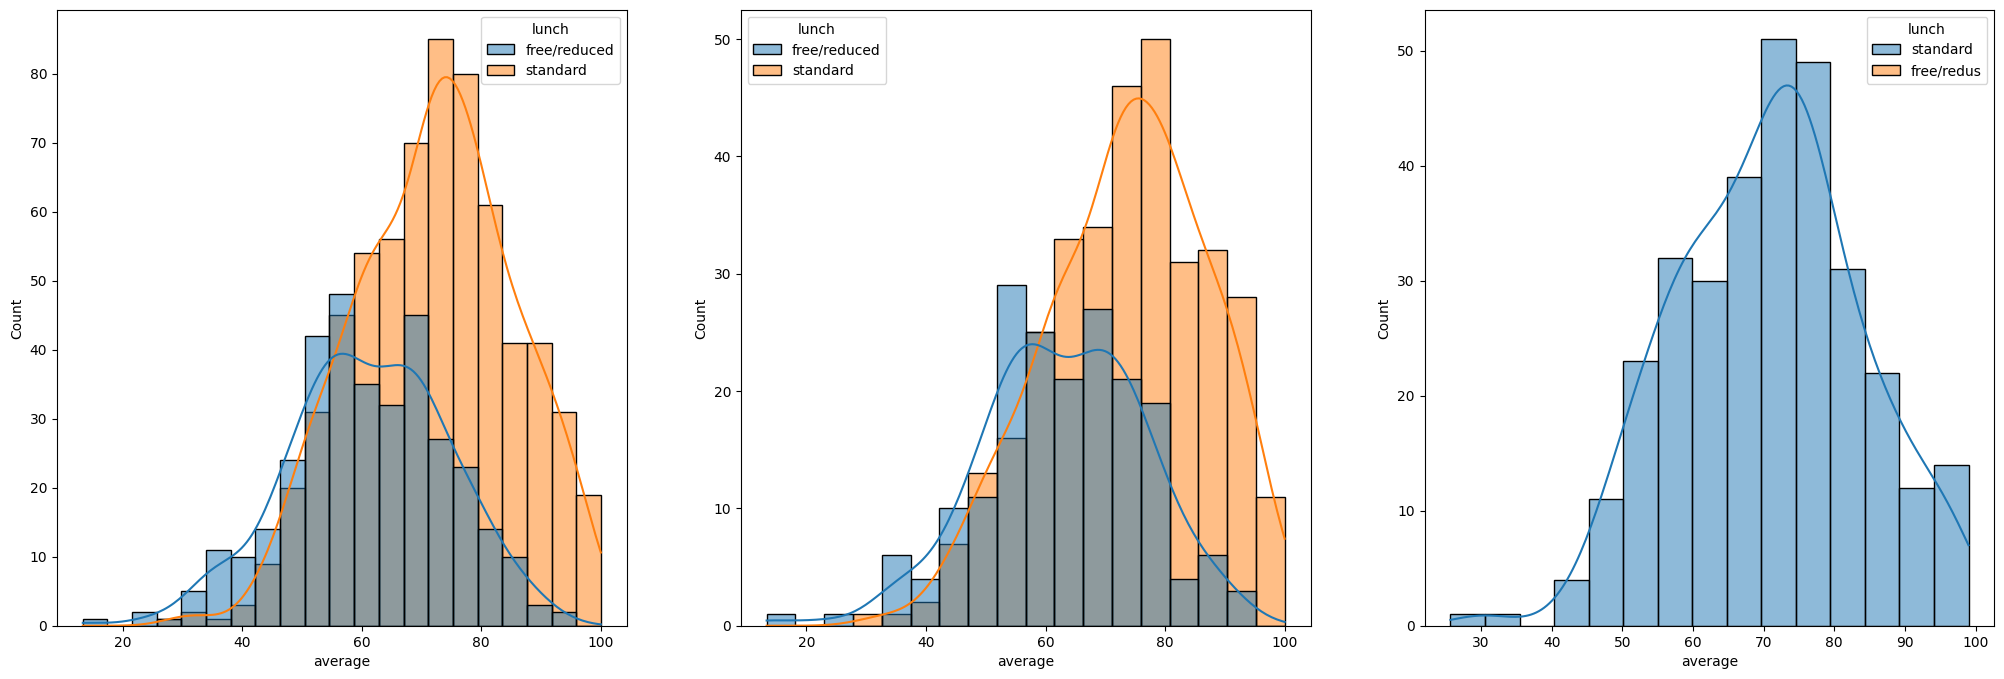

In [127]:
plt.subplots(1,3,figsize = (25,8))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'],x='average',kde = True,hue='lunch',hue_order=['standard','free/redus'])

### Insights or Observation
- Female student tend to perform well than male students
- Standard lunch helps perform well in exams be it a male Or female

### Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

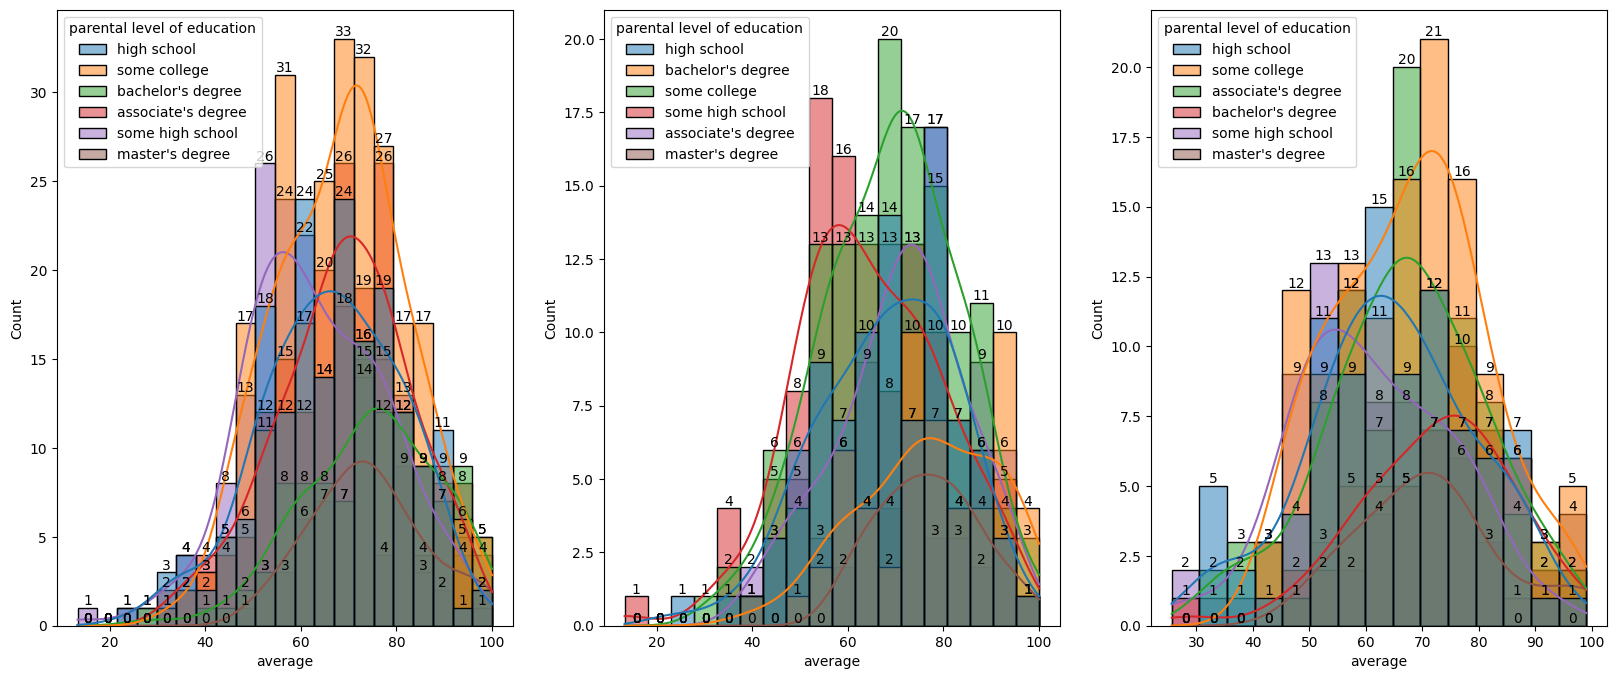

In [150]:
plt.subplots(1,3,figsize = (20,8))
plt.subplot(131)
ax = sns.histplot(data=df,x='average',hue='parental level of education',kde=True)
for i in ax.containers:
    ax.bar_label(i)
plt.subplot(132)
ax = sns.histplot(data=df[df['gender'] == 'female'],x='average',hue='parental level of education',kde=True,)
for i in ax.containers:
    ax.bar_label(i)
plt.subplot(133)
ax = sns.histplot(data=df[df['gender'] == 'male'],x='average',hue='parental level of education',kde=True,)
for i in ax.containers:
    ax.bar_label(i)

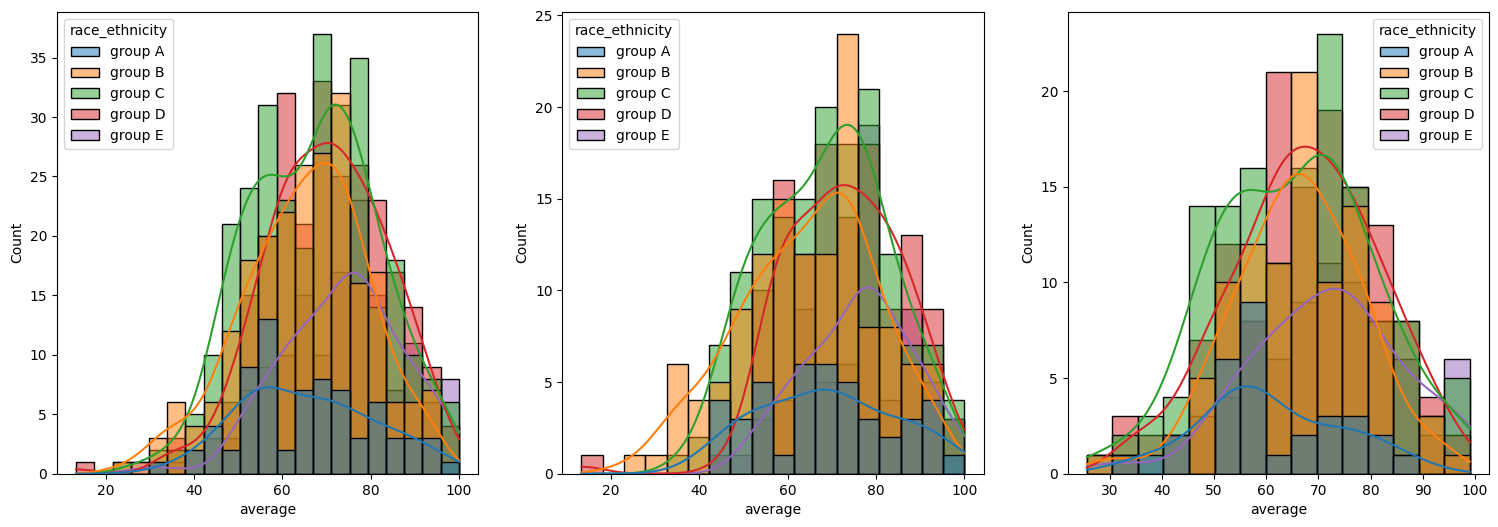

In [160]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity',hue_order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity',hue_order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity',hue_order=['group A', 'group B', 'group C', 'group D', 'group E'])
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<Axes: >

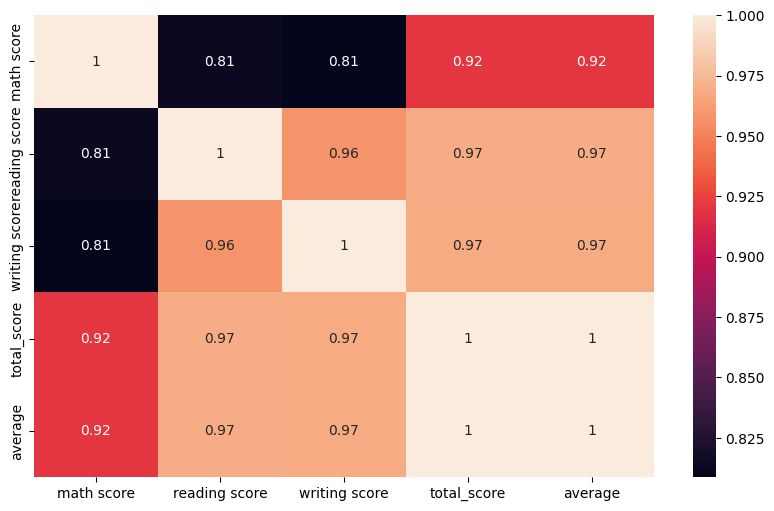

In [164]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
